In [1]:
import numpy as np
import matplotlib.pyplot as plt

from generalization_utils import gen_plot1
from toy_math import ToyModel

%load_ext autoreload
%autoreload 2

# Generalization

In [53]:
# Triangle
data = np.array([[0, 0], [2, 0], [1, 1.73205]])
data -= np.array([1, 0.57735])
data *= 0.75
data_labels = [0,1,2]

# Gaussian clouds
clusters, samples = 3, 10
mu, var = np.array([0,0]), 3
centers = np.random.multivariate_normal(mu, np.diag(np.array([var, var])**2), (clusters,))
data = np.empty((clusters*samples, 2))
data_labels = np.empty((clusters*samples,))
for i in range(clusters):
    mu, var, n = centers[i], 0.5, samples
    cov = np.diag(np.array([var, var])**2)
    data[samples*i:samples*(i+1)] = np.random.multivariate_normal(mu, cov, n)
    data_labels[samples*i:samples*(i+1)] = np.ones((samples,)) * i

100%|██████████| 40/40 [00:00<00:00, 302.66it/s]


np.float64(1.1102230246251566e-19)

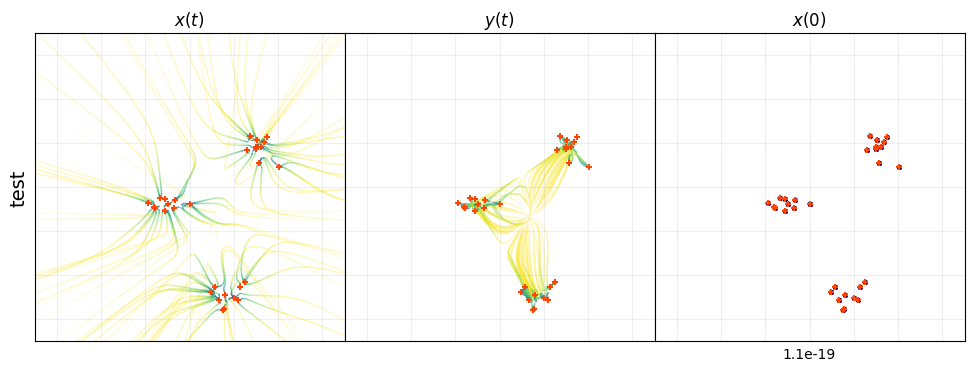

In [59]:
# Setup 
dim = data.shape[1]
num_steps, sigma_min, sigma_max, rho = 40, 2e-3, 80, 7

model = ToyModel(data=data, 
                 data_labels=data_labels, 
                 num_steps=num_steps, 
                 sigma_min=sigma_min, 
                 sigma_max=sigma_max, 
                 rho=rho, 
                 init='random',
                 pos_kwargs={'delta': 0e-1, 'cond': False},  # positive network 
                 neg_kwargs={'delta': None, 'cond': None},  # negative network
                 heun=False)

gen_plot1(model=model, 
          x_labels=None, 
          n=1000, 
          m=100, 
          guid_weight=0, 
          interval=None, 
          ylabel='test', 
          titles=True, 
          window_size=7)